In [3]:
import pandas as pd

In [4]:
import geocoder

In [66]:
import time
from tqdm import tqdm_notebook

In [5]:
df = pd.read_csv('open_stp_data.csv')

In [14]:
VO = df[df['addr_street'].str.contains('линия')]

In [15]:
VO[VO['addr_building'].isna() != True]

,addr_street,addr_number,addr_building,addr_letter,addr_district,comm_type,comm_num,comm_room_num,data_series,data_buildingdate,...,repair_year,repair_job,rfc_shaftcount,roof_metalarea,seng_liftcount,seng_pzu,special_basementarea,number,locality,searchable
2290,13-я линия В.О.,80,1,А,Василеостровский,"3 комн., 4 комн., 7 комн.","10, 8, 4","30, 32, 36",Индивидуальный,1934,...,NaN,NaN,NaN,812.0,NaN,4.0,608.0,2291,В.О. 13-я линия,"Санкт-Петербург, В.О. 13-я линия 80 к1"
2656,"21-я линия, В.О.",16,3,Д,Василеостровский,3 комн.,1,3,Индивидуальный,1932,...,NaN,NaN,NaN,1383.0,NaN,5.0,777.4,2657,"21-я линия, В.О.","Санкт-Петербург, 21-я линия, В.О. 16 к3"
3499,"17-я линия, В.О.",18,3,А,Василеостровский,NaN,NaN,NaN,NaN,2007,...,NaN,NaN,3.0,NaN,NaN,NaN,747.8,3500,"17-я линия, В.О.","Санкт-Петербург, 17-я линия, В.О. 18 к3"
3701,"21-я линия, В.О.",16,1,Б,Василеостровский,3 комн.,21,63,Индивидуальный,1930,...,NaN,NaN,NaN,1649.0,NaN,7.0,306.1,3702,"21-я линия, В.О.","Санкт-Петербург, 21-я линия, В.О. 16 к1"
5395,"21-я линия, В.О.",16,8,З,Василеостровский,"2 комн., 3 комн., 4 комн., 6 комн.","3, 11, 1, 0","6, 33, 4, 0",Индивидуальный,1934,...,NaN,NaN,NaN,1082.0,NaN,5.0,NaN,5396,"21-я линия, В.О.","Санкт-Петербург, 21-я линия, В.О. 16 к8"
6755,"21-я линия, В.О.",16,4,Г,Василеостровский,2 комн.,1,2,Индивидуальный,1932,...,NaN,NaN,NaN,1235.0,NaN,5.0,NaN,6756,"21-я линия, В.О.","Санкт-Петербург, 21-я линия, В.О. 16 к4"
7124,19-я линия В.О.,22,2,А,Василеостровский,3 комн.,1,3,Индивидуальный,1969,...,NaN,NaN,3.0,NaN,3.0,3.0,739.6,7125,В.О. 19-я линия,"Санкт-Петербург, В.О. 19-я линия 22 к2"
8891,"Кадетская линия, В.О.",1,2,А,Василеостровский,NaN,NaN,NaN,NaN,2006,...,NaN,NaN,NaN,1006.0,NaN,NaN,NaN,8892,"Кадетская линия, В.О.","Санкт-Петербург, Кадетская линия, В.О. 1 к2"
11780,13-я линия В.О.,44,3,А,Василеостровский,NaN,NaN,NaN,NaN,2002,...,NaN,NaN,1.0,408.0,1.0,NaN,234.5,11781,В.О. 13-я линия,"Санкт-Петербург, В.О. 13-я линия 44 к3"
12336,"21-я линия, В.О.",16,5,А,Василеостровский,"2 комн., 3 комн.","1, 16","2, 48",Индивидуальный,1930,...,NaN,NaN,NaN,1643.0,NaN,5.0,NaN,12337,"21-я линия, В.О.","Санкт-Петербург, 21-я линия, В.О. 16 к5"


In [61]:
VI_LINES = {1: ('1-я линия В.О.',),
2: ('2-3-я линии В.О.',),
3: ('2-3-я линии В.О.',),
4: ('4-5-я линии В.О.',),
5: ('4-5-я линии В.О.',),
6: ('6-я линия В.О.', '6-7-я линии В.О.'),
7: ('7-я линия В.О.', '6-7-я линии В.О.'),
8: ('8-я линия В.О.',), 
9: ('9-я линия В.О.',),
10: ('10-11-я линии В.О.',),
11: ('10-11-я линии В.О.',),
12: ('12-13-я линии В.О.',),
13: ('12-13-я линии В.О.',),
14: ('14-я линия В.О.', '14-15-я линии В.О.'),
15: ('15-я линия В.О.', '14-15-я линии В.О.'),
16: ('16-я линия В.О.', '16-17-я линии В.О.'),
17: ('17-я линия В.О.', '16-17-я линии В.О.'),
18: ('18-19-я линии В.О.',),
19: ('18-19-я линии В.О.',),
20: ('20-21-я линии В.О.',),
21: ('20-21-я линии В.О.',),
22: ('22-23-я линии В.О.',),
23: ('22-23-я линии В.О.',),
24: ('24-25-я линии В.О.',),
25: ('24-25-я линии В.О.',),
26: ('26-27-я линии В.О.',),
27: ('26-27-я линии В.О.',)}

In [30]:
VI_LINES

{1: ('1-я линия В.О.',),
 2: ('2-3-и линии В.О.',),
 3: ('2-3-и линии В.О.',),
 4: ('4-5-и линии В.О.',),
 5: ('4-5-и линии В.О.',),
 6: ('6-я линия В.О.', '6-7-и линии В.О.'),
 7: ('7-я линия В.О.', '6-7-и линии В.О.'),
 8: ('8-я линия В.О.',),
 9: ('9-я линия В.О.',),
 10: ('10-11-и линии В.О.',),
 11: ('10-11-и линии В.О.',),
 12: ('12-13-и линии В.О.',),
 13: ('12-13-и линии В.О.',),
 14: ('14-я линия В.О.', '14-15-и линии В.О.'),
 15: ('15-я линия В.О.', '14-15-и линии В.О.'),
 16: ('16-я линия В.О.', '16-17-и линии В.О.'),
 17: ('17-я линия В.О.', '16-17-и линии В.О.'),
 18: ('18-19-и линии В.О.',),
 19: ('18-19-и линии В.О.',),
 20: ('20-21-и линии В.О.',),
 21: ('20-21-и линии В.О.',),
 22: ('22-23-и линии В.О.',),
 23: ('22-23-и линии В.О.',),
 24: ('24-25-и линии В.О.',),
 25: ('24-25-и линии В.О.',),
 26: ('26-27-и линии В.О.',),
 27: ('26-27-и линии В.О.',)}

1
2-3
4-5
6-7 (6, 7)
8
9
10-11
12-13
14-15 (14, 15)
16-17 (16, 17)
18-19
20-21
22-23
24-25
26-27

In [16]:
import re

In [57]:
def loc_VO(string):
    try:
        string = re.sub(',', '', string)
        return VI_LINES[int(re.search('\d+', string).group(0))]
    except AttributeError:
        return (string.split(' ')[0] + ' линия В.О.', )

In [36]:
loc_VO('16-я линия, В.О.')

('16-я линия В.О.', '16-17-и линии В.О.')
-я линия В.О.


In [ ]:
df['searchable'] = df.apply(lambda x: full_address(loc_VO(x.['locality'], str(x['addr_number']), str(x['addr_building'])), axis=1)

In [7]:
def line_address(locality, number, building):
    if building == 'nan':
        return 'Санкт-Петербург, ' + locality + ' ' + number
    else:
        return 'Санкт-Петербург, ' + locality + ' ' + number + ' к' + building

TypeError: standartize_address() missing 1 required positional argument: 'street'

In [8]:
def standartize_address(street):
    
    shorthands = {'ул.': 'улица', 
                    'пр.': 'проспект',
                    'ш.': 'шоссе',
                    'пер.': 'переулок',
                    'бульв.': 'бульвар',
                    'наб.': 'набережная'}
    
    locality = None
    street = street.split(',')
    if len(street) == 2:
        locality = street[0]
        street = street[1]
    else:
        street = street[0]
    street = street.split(' ')
    if len(street) <= 1:
        return(street[0])
    else:
        status = street[-1]
        if status.lower() in shorthands:
            status = shorthands[status.lower()]
        if street[-2][-2:] in 'ая ий ый ое':
            if locality is not None:
                return ' '.join((locality + ',', ' '.join(street[:-1]), status))
            else:
                return ' '.join((' '.join(street[:-1]), status))
        else:
            if locality is not None:
                return ' '.join((locality + ',', status, ' '.join(street[0:-2]), street[-2]))
            else:
                return ' '.join((status, ' '.join(street[0:-2]), street[-2]))

In [9]:
def full_address(locality, number, building):
    if building == 'nan':
        return 'Санкт-Петербург, ' + locality + ' ' + number
    else:
        return 'Санкт-Петербург, ' + locality + ' ' + number + ' к' + building

In [64]:
for index, row in VO.iterrows():
    for locality in loc_VO(row['addr_street']):
        number = row['addr_number']
        building = row['addr_building']
        address = full_address(locality, str(number), str(building))

74 Санкт-Петербург, 1-я линия В.О. 18/2
126 Санкт-Петербург, 10-11-я линии В.О. 58
156 Санкт-Петербург, 16-я линия В.О. 49
156 Санкт-Петербург, 16-17-я линии В.О. 49
161 Санкт-Петербург, 9-я линия В.О. 52
166 Санкт-Петербург, 12-13-я линии В.О. 10
215 Санкт-Петербург, Кадетская линия В.О. 11
222 Санкт-Петербург, 10-11-я линии В.О. 26
235 Санкт-Петербург, 12-13-я линии В.О. 23
256 Санкт-Петербург, 4-5-я линии В.О. 22
257 Санкт-Петербург, 4-5-я линии В.О. 34
294 Санкт-Петербург, 8-я линия В.О. 53
352 Санкт-Петербург, 10-11-я линии В.О. 16
376 Санкт-Петербург, 7-я линия В.О. 12
376 Санкт-Петербург, 6-7-я линии В.О. 12
441 Санкт-Петербург, 15-я линия В.О. 8/40
441 Санкт-Петербург, 14-15-я линии В.О. 8/40
484 Санкт-Петербург, 16-я линия В.О. 13/46
484 Санкт-Петербург, 16-17-я линии В.О. 13/46
487 Санкт-Петербург, 10-11-я линии В.О. 44
501 Санкт-Петербург, 15-я линия В.О. 58
501 Санкт-Петербург, 14-15-я линии В.О. 58
503 Санкт-Петербург, Кадетская линия В.О. 21
666 Санкт-Петербург, 2-3-я лин

In [70]:
import csv
with open('VI.csv', 'a') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                        quotechar='|', quoting=csv.QUOTE_MINIMAL)
    
    for num, (index, row) in enumerate(VO.iterrows()):
        print(num)
        for locality in loc_VO(row['addr_street']):
            time.sleep(1)
            try:
                number = row['addr_number']
                building = row['addr_building']
                address = full_address(locality, str(number), str(building))
                g = geocoder.osm(address)
                if g.status == 'OK':
                    coords = (index, address, g.latlng[0], g.latlng[1])
                    print(coords)
                    writer.writerow(coords)
                    break
                else:
                    print()
            except Exception:
                print('ERROR', index, locality)
            

0
(74, 'Санкт-Петербург, 1-я линия В.О. 18/2', 59.9407373, 30.2911742)
1
(126, 'Санкт-Петербург, 10-11-я линии В.О. 58', 59.94457565, 30.2689821703448)
2
(156, 'Санкт-Петербург, 16-я линия В.О. 49', 59.9409084, 30.2645232)
3
(161, 'Санкт-Петербург, 9-я линия В.О. 52', 59.9448153, 30.2729736)
4
(166, 'Санкт-Петербург, 12-13-я линии В.О. 10', 59.935427, 30.2761842414417)
5
(215, 'Санкт-Петербург, Кадетская линия В.О. 11', 59.9439233, 30.2881924)
6
(222, 'Санкт-Петербург, 10-11-я линии В.О. 26', 59.9401869, 30.2742078945969)
7
(235, 'Санкт-Петербург, 12-13-я линии В.О. 23', 59.93983225, 30.2733969)
8
(256, 'Санкт-Петербург, 4-5-я линии В.О. 22', 59.941003, 30.2839735352011)
9
(257, 'Санкт-Петербург, 4-5-я линии В.О. 34', 59.9424244, 30.2824924)
10
(294, 'Санкт-Петербург, 8-я линия В.О. 53', 59.9436149, 30.2749756)
11
(352, 'Санкт-Петербург, 10-11-я линии В.О. 16', 59.93853805, 30.2765916477418)
12
(376, 'Санкт-Петербург, 7-я линия В.О. 12', 59.93763195, 30.2834884594358)
13
(441, 'Санкт-П

(4732, 'Санкт-Петербург, 12-13-я линии В.О. 30', 59.93961005, 30.2719183389865)
109
(4863, 'Санкт-Петербург, 6-я линия В.О. 23', 59.9416899, 30.2809433)
110
(4946, 'Санкт-Петербург, 9-я линия В.О. 20', 59.93952765, 30.2781390952327)
111
(4947, 'Санкт-Петербург, 4-5-я линии В.О. 30', 59.9418743, 30.2831636)
112
(4951, 'Санкт-Петербург, 8-я линия В.О. 43', 59.9417373, 30.2771382)
113
(4952, 'Санкт-Петербург, 2-3-я линии В.О. 39/16', 59.9445404, 30.2840264)
114
(4953, 'Санкт-Петербург, 8-я линия В.О. 15', 59.9375215, 30.2820283)
115
(4995, 'Санкт-Петербург, 4-5-я линии В.О. 8', 59.9419987, 30.2832896)
116
(5062, 'Санкт-Петербург, 2-3-я линии В.О. 44', 59.94582205, 30.2810304272189)
117
(5068, 'Санкт-Петербург, 2-3-я линии В.О. 36', 59.94512005, 30.2826307297316)
118
(5074, 'Санкт-Петербург, 26-27-я линии В.О. 8', 59.9283983, 30.2606873)
119
(5077, 'Санкт-Петербург, 8-я линия В.О. 63', 59.94545285, 30.2741826862842)
120
(5200, 'Санкт-Петербург, 18-19-я линии В.О. 37', 59.9395658, 30.263533

(8965, 'Санкт-Петербург, 2-3-я линии В.О. 15/7', 59.9413405, 30.2878843986913)
215
(9023, 'Санкт-Петербург, 10-11-я линии В.О. 9', 59.93907745, 30.2779527011828)
216
(9045, 'Санкт-Петербург, 7-я линия В.О. 40', 59.9417042, 30.2799336)
217
(9140, 'Санкт-Петербург, 2-3-я линии В.О. 45', 59.9462759, 30.2821127)
218
(9152, 'Санкт-Петербург, 6-я линия В.О. 49', 59.9466697, 30.2755500502054)
219
(9176, 'Санкт-Петербург, 18-19-я линии В.О. 19', 59.935809, 30.2673245923565)
220
(9182, 'Санкт-Петербург, Кадетская линия В.О. 31', 59.9473618, 30.2841847)
221
(9186, 'Санкт-Петербург, 17-я линия В.О. 18', 59.93733615, 30.267011672137)
222
(9227, 'Санкт-Петербург, 2-3-я линии В.О. 14', 59.942126, 30.2853911168242)
223
(9228, 'Санкт-Петербург, 17-я линия В.О. 14', 59.9363067, 30.269276)
224
(9274, 'Санкт-Петербург, 12-13-я линии В.О. 54', 59.9410629, 30.2708974)
225
(9332, 'Санкт-Петербург, 12-13-я линии В.О. 10', 59.935427, 30.2761842414417)
226
(9466, 'Санкт-Петербург, 2-3-я линии В.О. 16', 59.9424

(12725, 'Санкт-Петербург, 9-я линия В.О. 32', 59.9408453, 30.2775062)
319
(12755, 'Санкт-Петербург, 7-я линия В.О. 7', 59.93704145, 30.2845555924253)
320
(12773, 'Санкт-Петербург, 2-3-я линии В.О. 69', 59.9493729, 30.2777453)
321
(12879, 'Санкт-Петербург, 9-я линия В.О. 4', 59.9365376, 30.2825126)
322
(12937, 'Санкт-Петербург, 8-я линия В.О. 17', 59.9376732, 30.281847)
323
(13030, 'Санкт-Петербург, 16-я линия В.О. 43', 59.94010665, 30.265637587662)
324
(13068, 'Санкт-Петербург, 10-11-я линии В.О. 46', 59.9434023, 30.2701843494249)
325
(13073, 'Санкт-Петербург, 9-я линия В.О. 44', 59.942985, 30.274842)
326
(13257, 'Санкт-Петербург, 9-я линия В.О. 24', 59.9401079, 30.2783728)
327
(13297, 'Санкт-Петербург, 6-я линия В.О. 17', 59.9409952, 30.2814585)
328
(13336, 'Санкт-Петербург, 2-3-я линии В.О. 24', 59.9432558, 30.2848112)
329
(13346, 'Санкт-Петербург, 1-я линия В.О. 10', 59.9399964, 30.2912801399271)
330
(13359, 'Санкт-Петербург, 15-я линия В.О. 28', 59.93859705, 30.2687442638788)
331
(

(16692, 'Санкт-Петербург, 7-я линия В.О. 8', 59.9375335, 30.2847516)
423
(16786, 'Санкт-Петербург, 1-я линия В.О. 4', 59.93935, 30.2926633220468)
424
(16839, 'Санкт-Петербург, 15-я линия В.О. 46', 59.94135255, 30.2660267821702)
425
(16876, 'Санкт-Петербург, 12-13-я линии В.О. 21', 59.9396952, 30.2729879717504)
426
(17003, 'Санкт-Петербург, 2-3-я линии В.О. 42', 59.9457122, 30.2814106684607)
427
(17107, 'Санкт-Петербург, 9-я линия В.О. 22', 59.9399772, 30.278525)
428
(17110, 'Санкт-Петербург, 2-3-я линии В.О. 26', 59.9434303, 30.2846532)
429
(17116, 'Санкт-Петербург, 4-5-я линии В.О. 18', 59.9407143, 30.2844094)
430
(17128, 'Санкт-Петербург, 8-я линия В.О. 27', 59.9396838, 30.279605)
431
(17172, 'Санкт-Петербург, 2-3-я линии В.О. 17', 59.9416719, 30.287563)
432
(17195, 'Санкт-Петербург, 20-21-я линии В.О. 16 к6', 59.9298774, 30.2703357)
433
(17204, 'Санкт-Петербург, 18-19-я линии В.О. 43', 59.94020665, 30.26208499838)
434
(17209, 'Санкт-Петербург, 12-13-я линии В.О. 44', 59.94185645, 30

(20670, 'Санкт-Петербург, 10-11-я линии В.О. 48', 59.943528, 30.2699386318123)
526
(20673, 'Санкт-Петербург, 6-я линия В.О. 47', 59.9460687, 30.2755347)
527
(20767, 'Санкт-Петербург, 17-я линия В.О. 38', 59.940041, 30.2629135857177)
528
(20878, 'Санкт-Петербург, 6-я линия В.О. 21', 59.9414161, 30.2809553)
529
(20897, 'Санкт-Петербург, 4-5-я линии В.О. 36', 59.9427366, 30.2821097)
530
(20899, 'Санкт-Петербург, 2-3-я линии В.О. 19', 59.9419948, 30.2873516266917)
531
(20919, 'Санкт-Петербург, 2-3-я линии В.О. 9', 59.93969615, 30.2899363868118)
532
(20938, 'Санкт-Петербург, Кадетская линия В.О. 7/2', 59.9432934, 30.2889623)
533
(20960, 'Санкт-Петербург, 12-13-я линии В.О. 31', 59.94179255, 30.2712378709636)
534
(20974, 'Санкт-Петербург, 15-я линия В.О. 16', 59.943884, 30.2640523)
535
(20976, 'Санкт-Петербург, 16-я линия В.О. 35', 59.9387988, 30.2673260593438)
536
(21001, 'Санкт-Петербург, 16-я линия В.О. 69', 59.9428675, 30.2622731623487)
537
(21003, 'Санкт-Петербург, 9-я линия В.О. 56', 5

In [10]:
df['locality'] = df['addr_street'].map(standartize_address)

In [38]:
VO['searchable'] = VO.apply(lambda x: full_address(loc_VO(x['addr_street']), str(x['addr_number']), str(x['addr_building'])), axis=1)

('1-я линия В.О.',)
-я линия В.О.
('1-я линия В.О.',)
-я линия В.О.


TypeError: ('must be str, not NoneType', 'occurred at index 74')

In [8]:
g = geocoder.osm('Санкт-Петербургб фыва')
g.status

'ERROR - No results found'

In [40]:
import csv
with open('coordinates2.csv', 'a') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                        quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for address in tqdm_notebook(zip(df['searchable'][4372:], df.index[4372:])):
        try:
            g = geocoder.osm(address[0])
            if g.status == 'OK':
                coords = (address[1], g.latlng[0], g.latlng[1])
            else:
                coords = (address[1], None, None)
            time.sleep(1)
            writer.writerow(coords)
        except Exception:
            pass

/home/gustav/Projects/StPHousing/env/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%9A%D0%B8%D1%80%D0%B8%D0%BB%D0%BB%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+12&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fbdfc0af278>: Failed to establish a new connection: [Errno 101] Network is unreachable',))
Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%B3.%D0%9F%D1%83%D1%88%D0%BA%D0%B8%D0%BD%2C++%D0%9A%D1%80%D0%B0%D1%81%D0%BD%D0%BE%D1%81%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%BE%

Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0++%D0%A1%D0%B0%D0%B2%D1%83%D1%88%D0%BA%D0%B8%D0%BD%D0%B0+115+%D0%BA3&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fbdfc0afda0>: Failed to establish a new connection: [Errno 101] Network is unreachable',))
Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%A1%D0%B5%D0%B2%D0%B0%D1%81%D1%82%D0%BE%D0%BF%D0%BE%D0%BB%D1%8C%D1%81%D0%BA%D0%B0%D1%8F+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+6&format=json

Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%A1%D1%82%D0%B0%D1%80%D0%BE-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B3%D0%BE%D1%84%D1%81%D0%BA%D0%B8%D0%B9+%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82+8&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fbdfc0af630>: Failed to establish a new connection: [Errno 101] Network is unreachable',))
Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%92.%D0%9E.+8-%D1%8F+%D0%BB%D0%B8%D0%BD%D0%B8%D1%8F+37&format=jsonv2&address

Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%9A%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D1%87%D1%83%D0%B3%D1%81%D0%BA%D0%B0%D1%8F+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+21+%D0%BA3&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fbdfc0af1d0>: Failed to establish a new connection: [Errno 101] Network is unreachable',))
Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%9F%D1%80%D0%BE%D0%BB%D0%B5%D1%82%D0%B0%D1%80%D1%81%D0%BA%D0%B0%D1%8F+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+91&format

Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%B3.%D0%A1%D0%B5%D1%81%D1%82%D1%80%D0%BE%D1%80%D0%B5%D1%86%D0%BA%2C++%D1%83%D0%BB.%D0%92%D0%BE%D0%BB%D0%BE%D0%B4%D0%B0%D1%80%D1%81%D0%BA%D0%BE%D0%B3%D0%BE+3&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fbdfc0afba8>: Failed to establish a new connection: [Errno 101] Network is unreachable',))
Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%B3.+%D0%9A%D1%80%D0%B0%D1%81%D0%BD%D0%BE%D0%B5+%D1%81%D0%B5%D0%BB%D0%B

Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0++%D0%A1%D1%82%D0%BE%D0%B9%D0%BA%D0%BE%D1%81%D1%82%D0%B8+9&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fbdff5fa5f8>: Failed to establish a new connection: [Errno 101] Network is unreachable',))
Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%BD%D0%B0%D0%B1%D0%B5%D1%80%D0%B5%D0%B6%D0%BD%D0%B0%D1%8F+%D0%9A%D1%80%D1%8E%D0%BA%D0%BE%D0%B2%D0%B0+%D0%BA%D0%B0%D0%BD%D0%B0%D0%BB%D0%B0+23&f

Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%BF%D0%BE%D1%81.%D0%9F%D0%B5%D1%81%D0%BE%D1%87%D0%BD%D1%8B%D0%B9%2C+14-%D0%B9++%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB+221&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fbdfc0beac8>: Failed to establish a new connection: [Errno 101] Network is unreachable',))
Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%B3.%D0%9F%D1%83%D1%88%D0%BA%D0%B8%D0%BD%2C++%D0%9A%D0%B5%D0%B4%D1%80%D0%B8%D0%BD%D1%81%D0%BA%D0%B0%D1

Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%A0%D0%B5%D0%B2%D0%BE%D0%BB%D1%8E%D1%86%D0%B8%D0%B8++%D0%A8%D0%BE%D1%81%D1%81%D0%B5+15&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fbdfc0bee80>: Failed to establish a new connection: [Errno 101] Network is unreachable',))
Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%9B%D0%B5%D0%BD%D0%B8%D0%BD%D1%81%D0%BA%D0%B8%D0%B9+%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82+159&format=jsonv2&addressdetails=1&limit

Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%9A%D1%83%D0%B7%D0%BD%D0%B5%D1%86%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+44&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fbdfbf0aa90>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C+%D0%91%D0%B0%D1%81%D1%81%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+12&format=jsonv2&addressdetails=1&limit

In [34]:
for i in zip(df['searchable'], df.index):
    print(i)

('Санкт-Петербург, проспект  Королева 31 к1', 0)
('Санкт-Петербург, Дачный проспект 33 к1', 1)
('Санкт-Петербург, Будапештская улица 34', 2)
('Санкт-Петербург, Бухарестская улица 86 к2', 3)
('Санкт-Петербург, г.Пушкин,  Красносельское шоссе 65', 4)
('Санкт-Петербург, Славы  Пр. 2 к2', 5)
('Санкт-Петербург, улица Карла Маркса 14а', 6)
('Санкт-Петербург, пос.Металлострой, Полевая  ул. 25', 7)
('Санкт-Петербург, г. Ломоносов, улица  Победы 21', 8)
('Санкт-Петербург, Светлановский проспект 46 к1', 9)
('Санкт-Петербург, улица  Вавилова 22', 10)
('Санкт-Петербург, Новочеркасский проспект 45 к1', 11)
('Санкт-Петербург, Ленинский проспект 170', 12)
('Санкт-Петербург, Фарфоровская улица 24', 13)
('Санкт-Петербург, улица  Бабушкина 29 к2', 14)
('Санкт-Петербург, Андреевская улица 3', 15)
('Санкт-Петербург, Тосненский переулок 14', 16)
('Санкт-Петербург, улица  Панфилова 5А', 17)
('Санкт-Петербург, Лиговский проспект 164', 18)
('Санкт-Петербург, Воронежская улица 12', 19)
('Санкт-Петербург, улица

('Санкт-Петербург, улица  Кораблестроителей 35', 3324)
('Санкт-Петербург, В.О. Большой пр. 50', 3325)
('Санкт-Петербург, Большой Сампсониевский проспект 23', 3326)
('Санкт-Петербург, набережная Фонтанки реки 38', 3327)
('Санкт-Петербург, В.О. 9-я линия 66', 3328)
('Санкт-Петербург, проспект  Большевиков 13 к3', 3329)
('Санкт-Петербург, улица Профессора Попова 26', 3330)
('Санкт-Петербург, улица  Моисеенко 12-14', 3331)
('Санкт-Петербург, набережная Фонтанки реки 26', 3332)
('Санкт-Петербург, Стремянная улица 14', 3333)
('Санкт-Петербург, Подольская улица 42', 3334)
('Санкт-Петербург, Средний проспект 35', 3335)
('Санкт-Петербург, проспект  Авиаконструкторов 11 к1', 3336)
('Санкт-Петербург, Садовая улица 29', 3337)
('Санкт-Петербург, Турбинная улица 39', 3338)
('Санкт-Петербург, улица  Подковырова 15-17', 3339)
('Санкт-Петербург, Казанская улица 4', 3340)
('Санкт-Петербург, улица  Черняховского 27', 3341)
('Санкт-Петербург, пос.Песочный,  Железнодорожная улица 50', 3342)
('Санкт-Петербу

('Санкт-Петербург, Авангардная улица 20 к2', 6362)
('Санкт-Петербург, улица  Громова 6', 6363)
('Санкт-Петербург, Народная улица 16', 6364)
('Санкт-Петербург, Никольская улица 10', 6365)
('Санкт-Петербург, проспект  Заводской 20 к2', 6366)
('Санкт-Петербург, проспект  Заводской 22', 6367)
('Санкт-Петербург, улица  Декабристов 46', 6368)
('Санкт-Петербург, улица  Орбели 27 к4', 6369)
('Санкт-Петербург, Гражданский проспект 126 к2', 6370)
('Санкт-Петербург, Дибуновская улица 37', 6371)
('Санкт-Петербург, Стрельбищенская улица 14', 6372)
('Санкт-Петербург, Литовская улица 8', 6373)
('Санкт-Петербург, Таллинская улица 6', 6374)
('Санкт-Петербург, Посадская улица 36/11', 6375)
('Санкт-Петербург, улица  Орбели 31 к2', 6376)
('Санкт-Петербург, Дегтярный переулок 6', 6377)
('Санкт-Петербург, г. Красное Село,  Стрельнинское шоссе 6 к1', 6378)
('Санкт-Петербург, Дальневосточный проспект 56', 6379)
('Санкт-Петербург, проспект Большой П.С. 67', 6380)
('Санкт-Петербург, Измайловский проспект 3', 63

('Санкт-Петербург, Таврическая улица 2', 9618)
('Санкт-Петербург, проспект  Ленина 32', 9619)
('Санкт-Петербург, Разъезжая улица 4', 9620)
('Санкт-Петербург, 2-й Муринский проспект 24 к2', 9621)
('Санкт-Петербург, улица Белы Куна 4 к1', 9622)
('Санкт-Петербург, улица  Верности 30', 9623)
('Санкт-Петербург, улица  Здоровцева 27 к2', 9624)
('Санкт-Петербург, Школьная улица 48', 9625)
('Санкт-Петербург, Бухарестская улица 112', 9626)
('Санкт-Петербург, улица  Доблести 7 к2', 9627)
('Санкт-Петербург, Военная улица 18 к2', 9628)
('Санкт-Петербург, проспект  Художников 19 к1', 9629)
('Санкт-Петербург, пос. Комарово, улица  Громыхалова 16а', 9630)
('Санкт-Петербург, Будапештская улица 23 к2', 9631)
('Санкт-Петербург, г. Петергоф,  Санкт-Петербургский проспект 46', 9632)
('Санкт-Петербург, Поэтический бул. 11 к4', 9633)
('Санкт-Петербург, Пролетарская улица 67', 9634)
('Санкт-Петербург, улица  Восстания 1', 9635)
('Санкт-Петербург, пос.Песочный, 5-й  квартал 92', 9636)
('Санкт-Петербург, просп

('Санкт-Петербург, улица  Пугачева 6', 12922)
('Санкт-Петербург, Варшавская улица 27 к2', 12923)
('Санкт-Петербург, Гранитная улица 26', 12924)
('Санкт-Петербург, улица  Композиторов 20 к1', 12925)
('Санкт-Петербург, наб.кан.  Грибоедова 35', 12926)
('Санкт-Петербург, Новочеркасский проспект 24', 12927)
('Санкт-Петербург, Гороховая улица 50', 12928)
('Санкт-Петербург, улица  Гастелло 10', 12929)
('Санкт-Петербург, Большая Пороховская улица 34', 12930)
('Санкт-Петербург, г. Ломоносов,  Ораниенбаумский проспект 39 к2', 12931)
('Санкт-Петербург, Октябрьская набережная 94 к1', 12932)
('Санкт-Петербург, Дерптский переулок 15', 12933)
('Санкт-Петербург, улица  Шахматова 14', 12934)
('Санкт-Петербург, Якорная улица 3', 12935)
('Санкт-Петербург, Октябрьская набережная 90 к4', 12936)
('Санкт-Петербург, В.О. 8-я линия 17', 12937)
('Санкт-Петербург, Ковалевская улица 31', 12938)
('Санкт-Петербург, Галерная улица 30', 12939)
('Санкт-Петербург, улица  Декабристов 2', 12940)
('Санкт-Петербург, просп

('Санкт-Петербург, Выборгское шоссе 90', 15651)
('Санкт-Петербург, улица  Коллонтай 27 к1', 15652)
('Санкт-Петербург, проспект  Динамо 22', 15653)
('Санкт-Петербург, улица  Ворошилова 31 к3', 15654)
('Санкт-Петербург, проспект  Луначарского 44', 15655)
('Санкт-Петербург, г.Пушкин,  Октябрьский бульвар 8 к1', 15656)
('Санкт-Петербург, пос.Александровская,  Волхонское шоссе 52в', 15657)
('Санкт-Петербург, улица Пограничника Гарькавого 44 к4', 15658)
('Санкт-Петербург, 3-я Красноармейская улица 14', 15659)
('Санкт-Петербург, проспект  Луначарского 92', 15660)
('Санкт-Петербург, улица Лени Голикова 26', 15661)
('Санкт-Петербург, Пулковское шоссе 22 к3', 15662)
('Санкт-Петербург, улица  Танкистов 14', 15663)
('Санкт-Петербург, проспект  Тореза 104 к3', 15664)
('Санкт-Петербург, Пискаревский проспект 11', 15665)
('Санкт-Петербург, улица  Десантников 24', 15666)
('Санкт-Петербург, проспект  Просвещения 35', 15667)
('Санкт-Петербург, улица Зины Портновой 10', 15668)
('Санкт-Петербург, Дунайски

('Санкт-Петербург, Конная улица 20/6', 18605)
('Санкт-Петербург, Пионерская улица 8', 18606)
('Санкт-Петербург, НовоАлександровская улица 60', 18607)
('Санкт-Петербург, Средний проспект 54', 18608)
('Санкт-Петербург, улица Танкиста Хрустицкого 28', 18609)
('Санкт-Петербург, Комендантский проспект 33 к2', 18610)
('Санкт-Петербург, улица  Маяковского 18', 18611)
('Санкт-Петербург, 4-я Советская улица 17/8', 18612)
('Санкт-Петербург, Дрезденская улица 5', 18613)
('Санкт-Петербург, Коломенская улица 41', 18614)
('Санкт-Петербург, 15-я линия,  В.О. 66', 18615)
('Санкт-Петербург, Транспортный переулок 11', 18616)
('Санкт-Петербург, улица  Дыбенко 36 к3', 18617)
('Санкт-Петербург, Пионерская улица 61', 18618)
('Санкт-Петербург, Каменноостровский проспект 81', 18619)
('Санкт-Петербург, улица  Марата 12', 18620)
('Санкт-Петербург, Кирочная улица 18', 18621)
('Санкт-Петербург, Гданьская улица 3', 18622)
('Санкт-Петербург, проспект  Науки 12 к6', 18623)
('Санкт-Петербург, улица  Бабушкина 115 к5'

('Санкт-Петербург, Кавалергардская улица 22', 21719)
('Санкт-Петербург, Мойки  наб.реки 31', 21720)
('Санкт-Петербург, Долгоозерная улица 10', 21721)
('Санкт-Петербург, Вознесенский проспект 45', 21722)
('Санкт-Петербург, проспект  Стачек 105 к2', 21723)
('Санкт-Петербург, улица Маршала Говорова 7', 21724)
('Санкт-Петербург, проспект Маршала Жукова 68 к2', 21725)
('Санкт-Петербург, проспект  Стачек 142', 21726)
('Санкт-Петербург, улица Васи Алексеева 12', 21727)
('Санкт-Петербург, улица Зины Портновой 28', 21728)
('Санкт-Петербург, г.Павловск,  Конюшенная улица 25', 21729)
('Санкт-Петербург, г.Пушкин, улица  Генерала Хазова 43', 21730)
('Санкт-Петербург, улица  Костюшко 88', 21731)
('Санкт-Петербург, Глазурная улица 10', 21732)
('Санкт-Петербург, Скобелевский проспект 10', 21733)
('Санкт-Петербург, улица  Фрунзе 11', 21734)
('Санкт-Петербург, пос. Понтонный, улица  Александра Товпеко 16', 21735)
('Санкт-Петербург, набережная Фонтанки реки 179', 21736)
('Санкт-Петербург, проспект  Стаче

In [14]:
df['searchable'][0]

'Санкт-Петербург, проспект  Королева 31 к1'

In [16]:
a = [None,
 [59.8371606, 30.2628121],
 [59.86311185, 30.3760026393255],
 [59.8642619, 30.3898461760562],
 [59.7035591, 30.3608674008901],
 None,
 [59.7504734, 30.5888801267241],
 None,
 [59.9036119, 29.7696169],
 [60.0249241, 30.3817525],
 [59.7423442, 30.58989755],
 [59.9275836, 30.4125903],
 [59.8528132, 30.3114165],
 [59.8796156, 30.4337016104022],
 [59.8908475, 30.4281587],
 [59.99629555, 29.7642317527372],
 [59.74334865, 30.6046086],
 None,
 [59.91176595, 30.349100302754],
 [59.9179702, 30.3499406696604],
 None,
 [59.717854, 30.4060592],
 [59.9362189, 30.3676803],
 [59.9296829, 30.3507480065549],
 [59.91274655, 30.3508399965845],
 [59.9517114, 30.410437],
 [60.0063945, 30.4066724878941],
 [59.92449115, 30.3493128634555],
 [59.8994886, 30.3682884567568],
 [59.9001299, 30.3619947],
 [59.9441589, 30.3503358],
 None,
 None,
 [59.95670085, 30.411813],
 [59.91485055, 30.2989521073385],
 [59.8353306, 30.3917037365553],
 [59.74962175, 30.6065479785519],
 [59.83501975, 30.392958973801],
 [59.74819685, 30.6135747863541],
 [59.9403751, 30.4962290355362],
 [59.947037, 30.3823762],
 [60.0243176, 30.2416869986099],
 [59.9391854, 30.4793239],
 [59.9485886, 30.4812072539105],
 [59.95840535, 30.4104488127528],
 [59.9131809, 30.2954147],
 [59.9263417, 30.3053269963056],
 [59.933532, 30.2393263],
 [59.83765525, 30.204220478898],
 [59.9169766, 30.305427],
 None,
 None,
 [59.86013445, 30.24498485],
 [59.8579924, 30.2395216],
 [59.99752585, 29.7632663023832],
 None,
 None,
 [59.9022387, 30.2707897],
 [60.00525245, 30.2458204688005],
 [60.00112945, 30.2438787849814],
 [59.86697065, 30.4375364597524],
 None,
 [59.7337312, 30.07563345],
 [59.98359715, 30.3113735429746],
 [59.9828169, 30.3105342],
 [59.99523715, 30.314605331149],
 [59.8400397, 30.1766449316235],
 [59.9559682, 30.3051290128978],
 None,
 [60.02436625, 30.2920052],
 [59.8748216, 30.3011829643372],
 [59.88068195, 30.4723697394493],
 [59.8601483, 30.3268943703252],
 [60.0203177, 30.321585],
 None,
 [59.9893047, 30.3147250048941],
 [59.87311005, 30.4774082122105],
 [59.8700443, 29.8444771],
 [59.9245653, 30.3173009],
 None,
 [59.72980965, 30.4210766180108],
 [59.930162, 30.3499601],
 [59.91785965, 30.2929938033821],
 [59.9016395, 30.4252848],
 [59.95189345, 30.4145691448982],
 [59.83355765, 30.1516957749324],
 [60.03231565, 30.419415651008],
 [59.9952346, 29.7645067],
 [59.9922424, 29.7611233327738],
 [59.72685445, 30.4224172],
 [59.87694995, 30.2765652715838],
 [59.98570475, 30.2791587164922],
 [59.9951923, 29.7605425],
 [59.92523745, 30.4225420217657],
 [59.74829335, 30.5639815054703],
 [59.900647, 30.3697858],
 [59.788558, 30.1472063],
 [59.95053115, 30.4162297697019],
 [60.00117115, 29.7570686704303],
 [59.9767734, 30.4208794967604]]

In [18]:
! pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/57/4f/dd381ecf6c6ab9bcdaa8ea912e866dedc6e696756156d8ecc087e20817e2/matplotlib-3.1.1-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 71kB 415kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl


In [19]:
import matplotlib.pyplot as plt

In [23]:
aa = [elem  for elem in a if elem is not None]

In [25]:
x = [a[0] for a in aa]
y = [a[1] for a in aa]

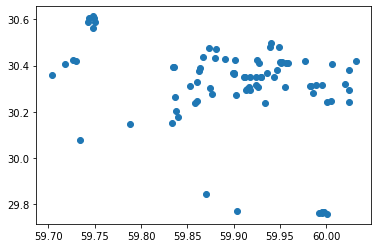

In [28]:
plt.plot(x, y, lw=0, marker='o')

In [35]:
! pip install tqdm

    100% |████████████████████████████████| 61kB 570kB/s ta 0:00:01
